In [3]:
import mne
import yasa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib qt

In [5]:
fname = '/Users/idohaber/Desktop/008/008_Resampled_sleep_zapline_N2N3_clean.set'
raw = mne.io.read_raw_eeglab(fname,preload=True)
data = raw.get_data(units="uV")

/Users/idohaber/Desktop/008/spindles/lib/python3.9/site-packages/pymatreader/utils.py:179: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Reading /Users/idohaber/Desktop/008/008_Resampled_sleep_zapline_N2N3_clean.fdt
Reading 0 ... 3654694  =      0.000 ... 18273.470 secs...


/var/folders/64/7tq575ss6rl3jlt3g5syvl6w0000gn/T/ipykernel_5372/685823623.py:2: RuntimeWarning: Limited 7 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fname,preload=True)
/var/folders/64/7tq575ss6rl3jlt3g5syvl6w0000gn/T/ipykernel_5372/685823623.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname,preload=True)


In [6]:

channel = raw.info['ch_names']
sf = raw.info['sfreq']
print(data.shape, sf, channel)

(172, 3654695) 200.0 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '68', '69', '70', '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '83', '84', '85', '86', '87', '88', '89', '90', '95', '96', '97', '98', '99', '100', '101', '106', '107', '108', '109', '110', '115', '116', '117', '118', '119', '124', '125', '126', '127', '128', '129', '130', '131', '132', '137', '138', '139', '140', '141', '142', '143', '144', '149', '150', '151', '152', '153', '154', '155', '159', '160', '161', '162', '163', '164', '169', '170', '171', '172', '173', '178', '179', '180', '181', '182', '183', '184', '185', '186', '191', '192', '193', '194', '195', '196', '197', 

In [31]:
# Plot and save the 2D sensor layout
fig_2d = raw.plot_sensors(kind='topomap', show_names=True, show=False)
plt.savefig('sensor_layout_2d.png', dpi=300, bbox_inches='tight')
plt.close()


In [8]:
# Run spindle detection on all channels (entire net)
sp = yasa.spindles_detect(data, sf, ch_names=channel, multi_only=False)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    9.6s finished
25-Jun-25 14:47:53 | WARNING | No spindle were found in channel 3.
25-Jun-25 14:48:13 | WARNING | No spindle were found in channel 21.
25-Jun-25 14:48:20 | WARNING | No spindle were found in channel 27.
25-Jun-25 14:48:42 | WARNING | No spindle were found in channel 48.
25-Jun-25 14:48:57 | WARNING | No spindle were found in channel 68.
25-Jun-25 14:48:59 | WARNING | No spindle were found in channel 71.
25-Jun-25 14:49:02 | WARNING | No spindle were found in channel 75.
25-Jun-25 14:49:07 

In [9]:
# Get detailed information about all detected spindles
df = sp.summary()  # general summary for each spindle
print(f"Total spindles detected: {len(df)}")
print(f"Average spindle duration: {df['Duration'].mean():.3f} seconds")
print(f"Average spindle amplitude: {df['Amplitude'].mean():.3f} μV")
print("\nFull spindle dataframe:")
df  # Inspect the dataframe

Total spindles detected: 3526
Average spindle duration: 0.763 seconds
Average spindle amplitude: 52.493 μV

Full spindle dataframe:


,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,10846.600,10847.120,10847.245,0.645,68.624918,15.395615,2.319136,0.260676,12.291854,8.0,0.800000,1,0
1,12763.050,12763.405,12763.905,0.855,44.599099,9.942364,1.994204,0.332282,12.126702,11.0,0.412791,1,0
2,12772.870,12773.485,12773.725,0.855,38.726942,8.984924,1.674634,0.250159,12.364870,9.0,0.715116,1,0
3,12906.210,12906.375,12906.905,0.695,43.192217,9.919406,1.990523,0.276825,12.178841,8.0,0.235714,1,0
4,13529.930,13530.405,13530.880,0.950,67.727136,12.956199,2.063519,0.320750,12.144504,11.0,0.497382,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,15034.805,15035.145,15035.440,0.635,57.883714,13.800181,2.213903,0.245133,12.285394,8.0,0.531250,224,171
3522,16372.450,16372.540,16373.045,0.595,46.396063,10.007647,2.076411,0.269398,13.578394,8.0,0.150000,224,171
3523,16649.650,16649.980,16650.455,0.805,85.388378,17.390589,2.425439,0.342012,12.444108,10.0,0.407407,224,171
3524,17026.610,17027.015,17027.165,0.555,50.605074,11.227040,2.117757,0.313553,12.728060,7.0,0.723214,224,171


Spindles detected per channel:
         Count  Duration  Amplitude        RMS  AbsPower  RelPower  Frequency  \
Channel                                                                         
1            7  0.802143  50.184288  11.005538  1.992339  0.292407  12.189285   
100         36  0.723333  44.963522  10.306821  1.974056  0.281089  12.300450   
101         10  0.660000  44.614876   9.983836  1.921099  0.281972  12.286562   
106          2  0.610000  61.481536  11.600822  2.091235  0.291760  12.306170   
109          1  0.585000  31.036678   8.622251  1.651902  0.263443  12.469290   
...        ...       ...        ...        ...       ...       ...        ...   
90          58  0.705086  55.478577  12.637757  2.191537  0.298171  12.294548   
95           2  0.627500  60.335831  13.218318  2.276507  0.291165  12.244685   
96           1  0.705000  49.633471  10.367676  2.066217  0.311588  12.479330   
98           2  0.595000  37.906259   8.515027  1.713906  0.268983  12.298949 

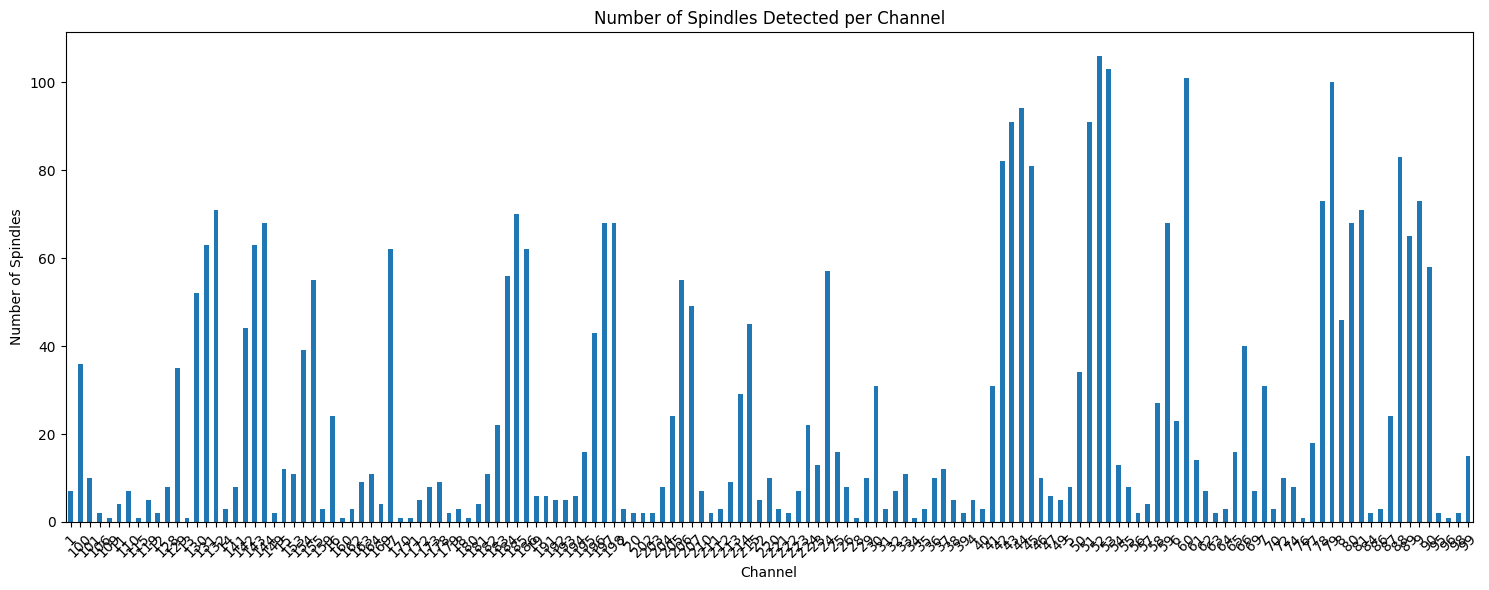

In [10]:
# Get summary statistics per channel
channel_summary = sp.summary(grp_chan=True)
print("Spindles detected per channel:")
print(channel_summary)

# Save channel summary to CSV
channel_summary.to_csv('spindles_per_channel_summary.csv')

# Create a bar plot of spindles per channel
plt.figure(figsize=(15, 6))
channel_summary['Count'].plot(kind='bar')
plt.title('Number of Spindles Detected per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Spindles')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('spindles_per_channel_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Save channel statistics to text file
with open('channel_statistics.txt', 'w') as f:
    f.write("Spindle Statistics per Channel\n")
    f.write("============================\n\n")
    f.write(f"Total number of channels analyzed: {len(channel_summary)}\n")
    f.write(f"Average spindles per channel: {channel_summary['Count'].mean():.2f}\n")
    f.write(f"Maximum spindles in a channel: {channel_summary['Count'].max():.0f}\n")
    f.write(f"Minimum spindles in a channel: {channel_summary['Count'].min():.0f}\n")
    f.write(f"Standard deviation: {channel_summary['Count'].std():.2f}\n")


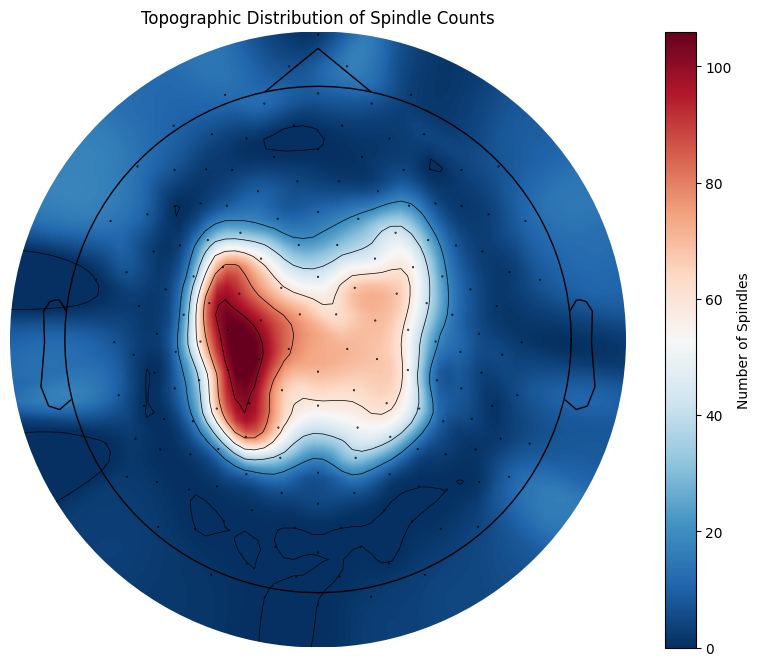

In [21]:

# Plot average spindle across all channels
%matplotlib inline

# Create data array matching the channels in raw.info
data_for_topomap = np.zeros(len(raw.ch_names))
ch_names = raw.ch_names
for ch in channel_summary.index:
    if ch in ch_names:
        idx = ch_names.index(ch)
        data_for_topomap[idx] = channel_summary.loc[ch, 'Count']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the topomap
im, cm = mne.viz.plot_topomap(data_for_topomap,
                             raw.info,
                             cmap='RdBu_r',
                             sensors=True,
                             show=False,
                             axes=ax)

# Add colorbar to the same figure
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Number of Spindles')

# Add title
ax.set_title('Topographic Distribution of Spindle Counts')

# Save and show the plot
plt.savefig('spindle_topographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Save the topomap data for future reference
np.save('spindle_topographic_data.npy', data_for_topomap)


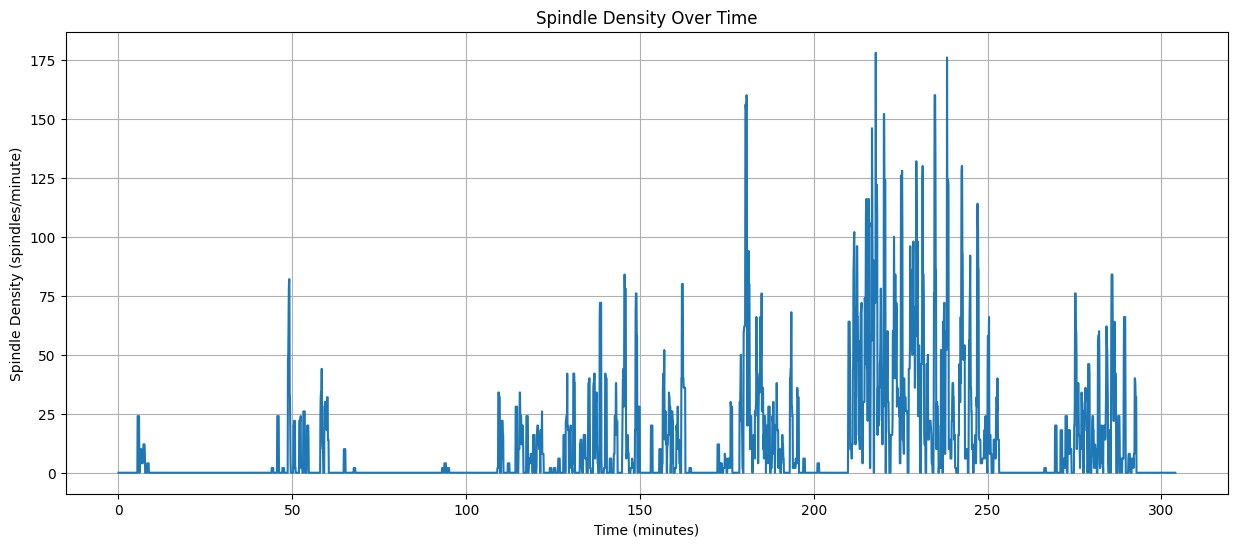

Spindle Analysis Summary

Temporal Statistics:
------------------
Average spindle density: 11.60 spindles/minute
Peak spindle density: 178.00 spindles/minute
Total recording duration: 304.56 minutes

Spindle Characteristics:
----------------------
Total spindles detected: 3526
Mean spindle duration: 0.763 ± 0.241 seconds
Mean spindle amplitude: 52.493 ± 16.314 μV
Mean spindle frequency: 12.294 ± 0.319 Hz



In [11]:
# Calculate spindle density over time
window_size = 30  # Window size in seconds
step_size = 5    # Step size in seconds
total_duration = len(data[0]) / sf  # Total duration in seconds

# Create time windows
windows = np.arange(0, total_duration - window_size, step_size)
density = []

# Calculate density for each window
for start in windows:
    start_idx = int(start * sf)
    end_idx = int((start + window_size) * sf)
    
    # Count spindles in this window
    window_spindles = df[
        (df['Start'] >= start) & 
        (df['Start'] < (start + window_size))
    ].shape[0]
    
    # Calculate density (spindles per minute)
    density.append(window_spindles * (60 / window_size))

# Save density data
density_df = pd.DataFrame({
    'Time_minutes': windows / 60,
    'Density_per_minute': density
})
density_df.to_csv('spindle_density_over_time.csv', index=False)

# Plot spindle density over time
plt.figure(figsize=(15, 6))
plt.plot(windows / 60, density)  # Convert time to minutes
plt.xlabel('Time (minutes)')
plt.ylabel('Spindle Density (spindles/minute)')
plt.title('Spindle Density Over Time')
plt.grid(True)
plt.savefig('spindle_density_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Save detailed spindle information
df.to_csv('all_spindles_detailed.csv', index=False)

# Calculate and save statistics
stats_text = f"""Spindle Analysis Summary
=====================

Temporal Statistics:
------------------
Average spindle density: {np.mean(density):.2f} spindles/minute
Peak spindle density: {np.max(density):.2f} spindles/minute
Total recording duration: {total_duration/60:.2f} minutes

Spindle Characteristics:
----------------------
Total spindles detected: {len(df)}
Mean spindle duration: {df['Duration'].mean():.3f} ± {df['Duration'].std():.3f} seconds
Mean spindle amplitude: {df['Amplitude'].mean():.3f} ± {df['Amplitude'].std():.3f} μV
Mean spindle frequency: {df['Frequency'].mean():.3f} ± {df['Frequency'].std():.3f} Hz
"""

with open('spindle_analysis_summary.txt', 'w') as f:
    f.write(stats_text)

print(stats_text)


Data shape: (172, 3654695)
Channel index: 21, Start: 3475555, End: 3476676


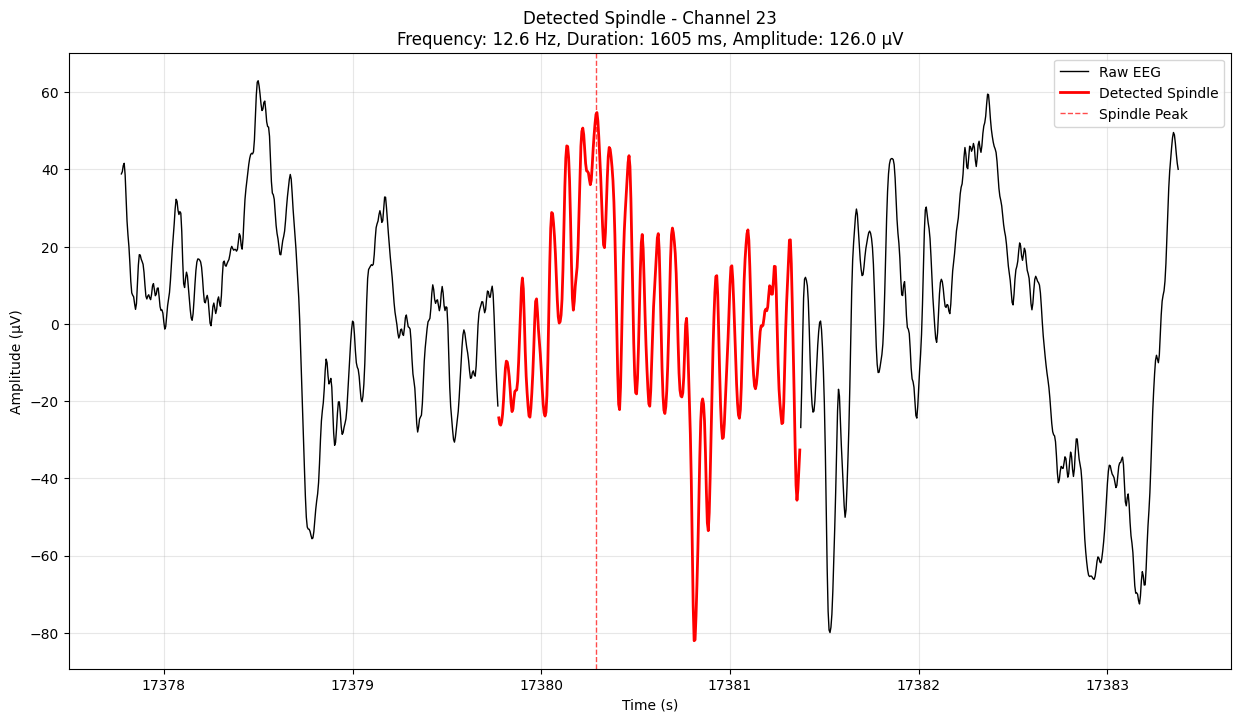

Displayed spindle from channel 23 at time 17379.8s


In [28]:
# 1. Simple Spindle Overlay Plot
# Get a good example spindle (one of the highest amplitude ones)
example_spindle = df.sort_values('Amplitude', ascending=False).iloc[0]
ch_idx = example_spindle['IdxChannel']

# Get data around the spindle with context
margin = int(2 * sf)  # 2 seconds margin
start_sample = int(example_spindle['Start'] * sf) - margin
end_sample = int(example_spindle['End'] * sf) + margin

# Get data using MNE raw object to ensure correct format
eeg_data = raw.get_data(units="uV")
print(f"Data shape: {eeg_data.shape}")
print(f"Channel index: {ch_idx}, Start: {start_sample}, End: {end_sample}")

# Make sure we don't go out of bounds
start_sample = max(0, start_sample)
end_sample = min(eeg_data.shape[1], end_sample)

# Extract the data
raw_signal = eeg_data[ch_idx, start_sample:end_sample]
time = np.arange(start_sample, end_sample) / sf

# Create the plot
plt.figure(figsize=(15, 8))

# Find the indices for the spindle region within our time window
spindle_start_idx = int((example_spindle['Start'] - time[0]) * sf)
spindle_end_idx = int((example_spindle['End'] - time[0]) * sf)

# Make sure indices are within bounds
spindle_start_idx = max(0, spindle_start_idx)
spindle_end_idx = min(len(time), spindle_end_idx)

# Plot the signal in segments
# Before spindle (black)
if spindle_start_idx > 0:
    plt.plot(time[:spindle_start_idx], raw_signal[:spindle_start_idx], 
             'k', linewidth=1, label='Raw EEG')

# During spindle (red)
if spindle_end_idx > spindle_start_idx:
    plt.plot(time[spindle_start_idx:spindle_end_idx], 
             raw_signal[spindle_start_idx:spindle_end_idx], 
             'r', linewidth=2, label='Detected Spindle')

# After spindle (black)
if spindle_end_idx < len(time):
    plt.plot(time[spindle_end_idx:], raw_signal[spindle_end_idx:], 
             'k', linewidth=1)

# Mark the peak of the spindle
plt.axvline(example_spindle['Peak'], color='red', linestyle='--', 
            linewidth=1, alpha=0.7, label='Spindle Peak')

plt.title(f'Detected Spindle - Channel {example_spindle["Channel"]}\n'
          f'Frequency: {example_spindle["Frequency"]:.1f} Hz, '
          f'Duration: {example_spindle["Duration"]*1000:.0f} ms, '
          f'Amplitude: {example_spindle["Amplitude"]:.1f} μV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.legend()
plt.grid(True, alpha=0.3)

# Save the figure
plt.savefig('reports/assets/June_25/spindle_overlay.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Displayed spindle from channel {example_spindle['Channel']} at time {example_spindle['Start']:.1f}s")


Available channels with spindles: ['1', '100', '101', '106', '109', '11', '110', '115', '119', '12', '128', '129', '13', '130', '131', '132', '14', '141', '142', '143', '144', '149', '15', '153', '154', '155', '159', '16', '160', '162', '163', '164', '169', '17', '170', '171', '172', '173', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '19', '191', '192', '193', '194', '195', '196', '197', '198', '2', '20', '202', '203', '204', '205', '206', '207', '210', '211', '212', '213', '214', '215', '22', '220', '221', '222', '223', '224', '23', '24', '25', '26', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '69', '7', '70', '72', '74', '76', '77', '78', '79', '8', '80', '81', '84', '86', '87', '88', '89', '9', '90', '95', '96', '98', '99']
Frontal channels with spindles: ['20', 

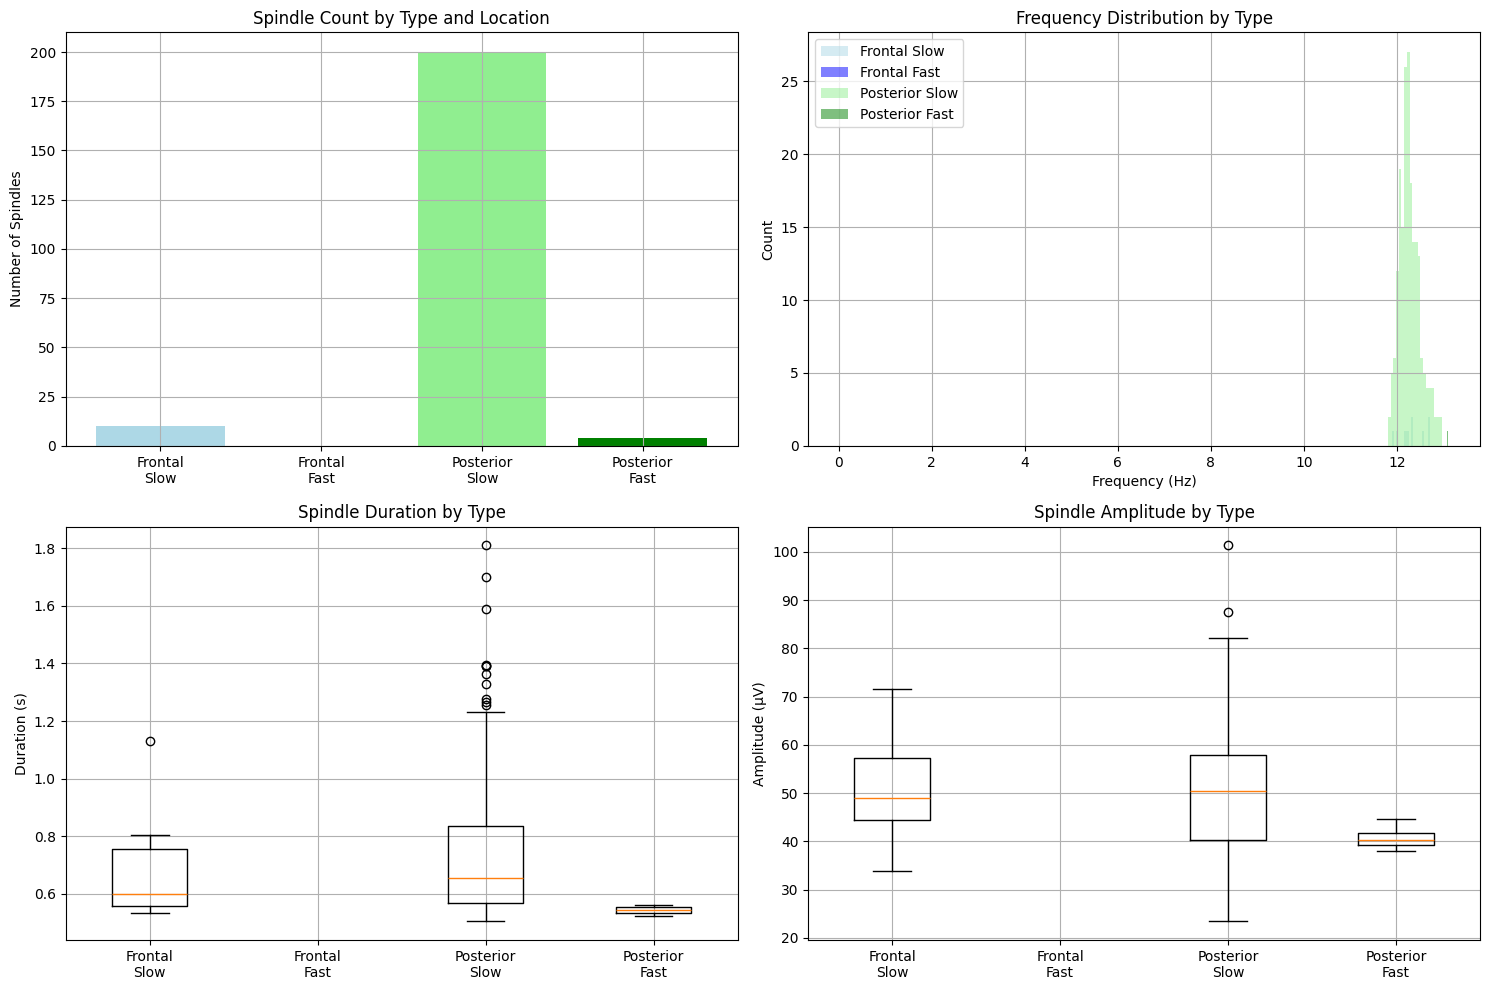


Summary Statistics:
Frontal Slow Spindles: 10 (mean freq: 12.32 Hz)
Frontal Fast Spindles: 0 (mean freq: nan Hz)
Posterior Slow Spindles: 200 (mean freq: 12.28 Hz)
Posterior Fast Spindles: 4 (mean freq: 13.08 Hz)


In [36]:
# 2. Slow vs Fast Spindles Analysis

# Define frequency ranges
slow_range = (11, 13)  # Slow spindles: 11-13 Hz
fast_range = (13, 16)  # Fast spindles: 13-16 Hz

# Define regions based on your specification
# Frontal channels
frontal_channels = ['20', '27', '34', '21', '28', '13', '4']

# Posterior channels
posterior_channels = ['101', '100', '129', '89', '90']

# Let's also check what channels actually have spindles
available_channels = df['Channel'].unique()
print(f"Available channels with spindles: {sorted(available_channels)}")

# Filter to only use channels that actually have spindles
frontal_channels = [ch for ch in frontal_channels if ch in available_channels]
posterior_channels = [ch for ch in posterior_channels if ch in available_channels]

print(f"Frontal channels with spindles: {frontal_channels}")
print(f"Posterior channels with spindles: {posterior_channels}")

# If we don't have enough channels, use a different approach
if len(frontal_channels) == 0 or len(posterior_channels) == 0:
    print("Using frequency-based comparison instead of location-based")
    # Just use all channels and compare slow vs fast
    all_channels = list(available_channels)
    frontal_channels = all_channels[:len(all_channels)//2]  # First half
    posterior_channels = all_channels[len(all_channels)//2:]  # Second half
    print(f"Using first half as 'frontal': {frontal_channels[:10]}...")  # Show first 10
    print(f"Using second half as 'posterior': {posterior_channels[:10]}...")  # Show first 10

# Function to get spindles by frequency range and channels
def get_spindles_by_type(df, freq_range, channels):
    mask = (df['Frequency'] >= freq_range[0]) & \
           (df['Frequency'] < freq_range[1]) & \
           df['Channel'].isin(channels)
    return df[mask]

# Get spindles for each category
frontal_slow = get_spindles_by_type(df, slow_range, frontal_channels)
frontal_fast = get_spindles_by_type(df, fast_range, frontal_channels)
posterior_slow = get_spindles_by_type(df, slow_range, posterior_channels)
posterior_fast = get_spindles_by_type(df, fast_range, posterior_channels)

# Create visualization
plt.figure(figsize=(15, 10))

# 1. Spindle count comparison
plt.subplot(2, 2, 1)
counts = [len(frontal_slow), len(frontal_fast), len(posterior_slow), len(posterior_fast)]
labels = ['Frontal\nSlow', 'Frontal\nFast', 'Posterior\nSlow', 'Posterior\nFast']
plt.bar(range(len(counts)), counts, color=['lightblue', 'blue', 'lightgreen', 'green'])
plt.xticks(range(len(counts)), labels)
plt.title('Spindle Count by Type and Location')
plt.ylabel('Number of Spindles')
plt.grid(True)

# 2. Frequency distributions
plt.subplot(2, 2, 2)
plt.hist(frontal_slow['Frequency'], bins=20, alpha=0.5, label='Frontal Slow', color='lightblue')
plt.hist(frontal_fast['Frequency'], bins=20, alpha=0.5, label='Frontal Fast', color='blue')
plt.hist(posterior_slow['Frequency'], bins=20, alpha=0.5, label='Posterior Slow', color='lightgreen')
plt.hist(posterior_fast['Frequency'], bins=20, alpha=0.5, label='Posterior Fast', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count')
plt.title('Frequency Distribution by Type')
plt.legend()
plt.grid(True)

# 3. Duration comparison
plt.subplot(2, 2, 3)
data = [frontal_slow['Duration'], frontal_fast['Duration'], 
        posterior_slow['Duration'], posterior_fast['Duration']]
box_plot = plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.ylabel('Duration (s)')
plt.title('Spindle Duration by Type')
plt.grid(True)

# 4. Amplitude comparison
plt.subplot(2, 2, 4)
data = [frontal_slow['Amplitude'], frontal_fast['Amplitude'], 
        posterior_slow['Amplitude'], posterior_fast['Amplitude']]
box_plot = plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.ylabel('Amplitude (μV)')
plt.title('Spindle Amplitude by Type')
plt.grid(True)

plt.tight_layout()
plt.savefig('reports/assets/June_25/spindle_types_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Frontal Slow Spindles: {len(frontal_slow)} (mean freq: {frontal_slow['Frequency'].mean():.2f} Hz)")
print(f"Frontal Fast Spindles: {len(frontal_fast)} (mean freq: {frontal_fast['Frequency'].mean():.2f} Hz)")
print(f"Posterior Slow Spindles: {len(posterior_slow)} (mean freq: {posterior_slow['Frequency'].mean():.2f} Hz)")
print(f"Posterior Fast Spindles: {len(posterior_fast)} (mean freq: {posterior_fast['Frequency'].mean():.2f} Hz)")


Frontal channels: ['20', '27', '34', '21', '28', '13', '4']
Posterior channels: ['101', '100', '129', '89', '90']
Total Frontal: 7, Total Posterior: 5


/var/folders/64/7tq575ss6rl3jlt3g5syvl6w0000gn/T/ipykernel_5372/3636425017.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/64/7tq575ss6rl3jlt3g5syvl6w0000gn/T/ipykernel_5372/3636425017.py:63: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

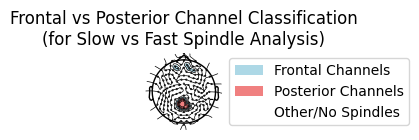

Frontal channels used: ['20', '34', '28', '13', '4']
Posterior channels used: ['101', '100', '129', '89', '90']


In [37]:
# Create a topomap showing frontal and posterior regions
# Create data array for region visualization
region_data = np.zeros(len(raw.ch_names))
ch_names = raw.ch_names

# Get the channel lists from the previous analysis
available_channels = df['Channel'].unique()

# Define regions based on your specification
# Frontal channels
frontal_channels_defined = ['20', '27', '34', '21', '28', '13', '4']

# Posterior channels
posterior_channels_defined = ['101', '100', '129', '89', '90']

print(f"Frontal channels: {frontal_channels_defined}")
print(f"Posterior channels: {posterior_channels_defined}")
print(f"Total Frontal: {len(frontal_channels_defined)}, Total Posterior: {len(posterior_channels_defined)}")

# Filter to channels that exist and have spindles
frontal_channels_actual = [ch for ch in frontal_channels_defined if ch in available_channels]
posterior_channels_actual = [ch for ch in posterior_channels_defined if ch in available_channels]

# If we don't have predefined regions, use the fallback from previous analysis
if len(frontal_channels_actual) == 0 or len(posterior_channels_actual) == 0:
    all_channels = list(available_channels)
    frontal_channels_actual = all_channels[:len(all_channels)//2]
    posterior_channels_actual = all_channels[len(all_channels)//2:]

# Assign values: 1 for frontal, 2 for posterior, 0 for other/no spindles
for ch in ch_names:
    if ch in frontal_channels_actual:
        idx = ch_names.index(ch)
        region_data[idx] = 1  # Frontal
    elif ch in posterior_channels_actual:
        idx = ch_names.index(ch)
        region_data[idx] = 2  # Posterior

# Create the topomap
plt.figure(figsize=(10, 8))

# Create custom colormap for regions
from matplotlib.colors import ListedColormap
colors = ['white', 'lightblue', 'lightcoral']  # white=no data, blue=frontal, coral=posterior
custom_cmap = ListedColormap(colors)

im, cm = mne.viz.plot_topomap(region_data,
                             raw.info,
                             cmap=custom_cmap,
                             sensors=True,
                             show=False)

# Add title
plt.title('Frontal vs Posterior Channel Classification\n(for Slow vs Fast Spindle Analysis)')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', label='Frontal Channels'),
                  Patch(facecolor='lightcoral', label='Posterior Channels'),
                  Patch(facecolor='white', label='Other/No Spindles')]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('reports/assets/June_25/frontal_posterior_regions.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Frontal channels used: {frontal_channels_actual}")
print(f"Posterior channels used: {posterior_channels_actual}")
